# Hubbard Model

## Simulation of two fermionic modes

Hamiltonian:

$$
H = \frac{V}{2}  \big(\sigma_x\otimes\sigma_x+\sigma_y\otimes\sigma_y\big)
+\frac{U}{4}\big(\sigma_z\otimes\sigma_z+I\otimes\sigma_z+\sigma_z\otimes I\big)
$$


In [1]:
#some necessary imports

import numpy as np
from numpy import pi
import qiskit
from qiskit import *
import matplotlib.pyplot as plt
%matplotlib inline 

In [2]:
IBMQ.load_account()
backend = Aer.get_backend('qasm_simulator')

In [105]:
# Creating circuit
def ev_circ(U,V,n,t):
    
    qc = QuantumCircuit(2)
    qc.x(0)
    qc.barrier()
    qc.h(1)
    psi1 = V*t/(2*n)
    psi2 = U*t/(4*n)
    
    for j in range(n):
        for i in range(1):
            qc.barrier()
            #sigma_x sigma_x term
            qc.ry(pi/2, i)
            qc.ry(pi/2, i+1)
            qc.cx(i,i+1)
            qc.rz(2*psi1, i+1)
            qc.cx(i,i+1)
            qc.ry(-pi/2, i+1)
            qc.ry(-pi/2, i)
            qc.barrier()
        
        
            #sigma_x sigma_x term
            qc.rx(-pi/2, i)
            qc.rx(-pi/2, i+1)
            qc.cx(i,i+1)
            qc.rz(2*psi1, i+1)
            qc.cx(i,i+1)
            qc.rx(pi/2, i+1)
            qc.rx(pi/2, i)
            qc.barrier()
        
            #sigma_z sigma_z term
            qc.cx(i,i+1)
            qc.rz(2*psi2, i+1)
            qc.cx(i,i+1)
        
        qc.rz(2*psi2,[0,1])
    qc.measure_all()
        
    return qc


#Genrating time dependent V function
def V_fun(t):
    if (t<1):
        V=0
    elif(1<t<2):
        V=t-1
    else:
        V=1
    return V

In [106]:
#Intraction strength
V = 1
U = 1

#Number of trotter steps
n = 5
t = np.linspace(0,5,500)

circ = []

for t0 in t:
    circ.append(ev_circ(U,V,n,t0))

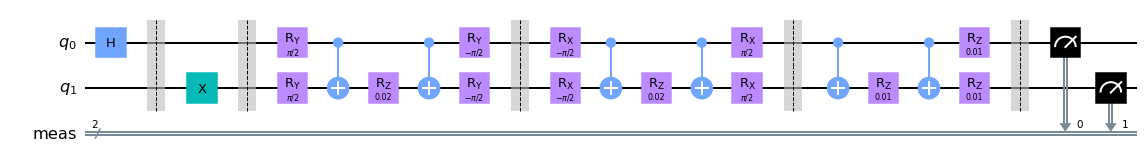

In [14]:
circ[2].draw('mpl')

In [107]:
results = execute(circ, backend, shots=1024).result()
counts = results.get_counts()

In [26]:
counts[10]

{'01': 4, '11': 486, '10': 534}

In [108]:
C00 = []
C01 = []
C10 = []
C11 = []

for co in counts:
    C00.append(co.get('00',0)/1024)
    C01.append(co.get('01',0)/1024)
    C10.append(co.get('10',0)/1024)
    C11.append(co.get('11',0)/1024)
    

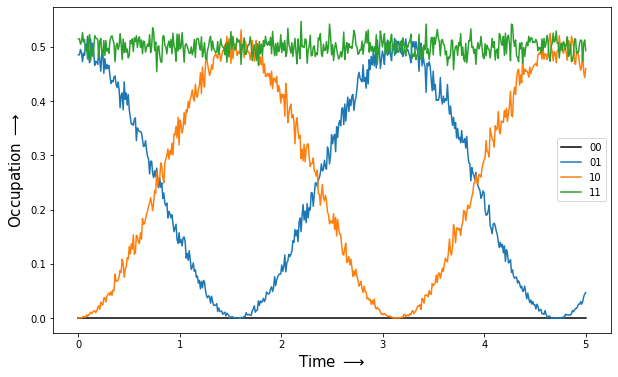

In [109]:
fig = plt.figure(figsize=[10,6])
plt.plot(t,C00, color = 'black')
plt.plot(t,C01)
plt.plot(t,C10)
plt.plot(t,C11)

#plt.title('')
plt.xlabel(rf'Time $\longrightarrow$',fontsize=15)
plt.ylabel(rf'Occupation $\longrightarrow$',fontsize=15)

plt.legend(['00','01','10','11'])
plt.show()


### With time dependent V

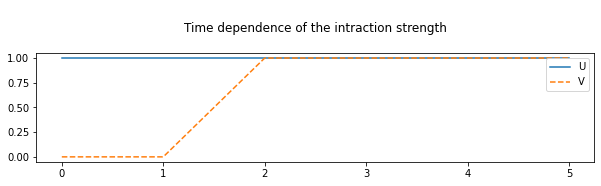

In [180]:
t = np.linspace(0,5,500)
u = []
v = []
for t0 in t:
    v.append(V_fun(t0))
    u.append(1)
    
fig = plt.figure(figsize=[10,2])
plt.plot(t,u)
plt.plot(t,v,'--')
plt.title('\nTime dependence of the intraction strength\n')
plt.legend(['U','V'])
plt.show()

In [159]:
U = 1
n = 5
t = np.linspace(0,5,500)
circ = []

for t0 in t:
    V = V_fun(t0)
    circ.append(ev_circ(U,V,n,t0))

In [156]:
results = execute(circ, backend, shots=1024).result()
counts = results.get_counts()

In [157]:
C00 = []
C01 = []
C10 = []
C11 = []

for co in counts:
    C00.append(co.get('00',0)/1024)
    C01.append(co.get('01',0)/1024)
    C10.append(co.get('10',0)/1024)
    C11.append(co.get('11',0)/1024)
    

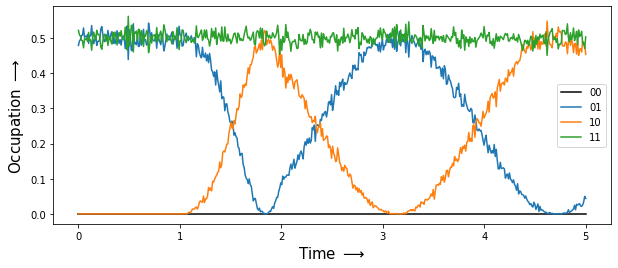

In [153]:
fig = plt.figure(figsize=[10,4])
plt.plot(t,C00, color = 'black')
plt.plot(t,C01)
plt.plot(t,C10)
plt.plot(t,C11)

#plt.title('')
plt.xlabel(rf'Time $\longrightarrow$',fontsize=15)
plt.ylabel(rf'Occupation $\longrightarrow$',fontsize=15)

plt.legend(['00','01','10','11'])
plt.show()


## Simulation of three fermionic modes

In [181]:
l = [2,1]

# Creating circuit
def ev_circ3(U,V,n,t):
    
    qc = QuantumCircuit(3)
    qc.x(1)
    qc.barrier()
    qc.h(0)
    qc.cx(0,1)
    qc.barrier()
    qc.x(2)
    psi1 = V*t/(2*n)
    psi2 = U*t/(4*n)
    
    for j in range(n):
        for i in l:
            qc.barrier()
            
            #sigma_z sigma_z term
            qc.cx(i-1,i)
            qc.rz(2*psi2, i)
            qc.cx(i-1,i)
            
            if (i==2):
                qc.rz(4*psi2,i-1)
                qc.rz(2*psi2,[0,2])

        for i in l:
            qc.barrier()
            
            #sigma_y sigma_y term
            qc.rx(-pi/2, i-1)
            qc.rx(-pi/2, i)
            qc.cx(i-1,i)
            qc.rz(2*psi1, i)
            qc.cx(i-1,i)
            qc.rx(pi/2, i)
            qc.rx(pi/2, i-1)
            qc.barrier()
                
            #sigma_x sigma_x term
            qc.ry(pi/2, i-1)
            qc.ry(pi/2, i)
            qc.cx(i-1,i)
            qc.rz(2*psi1, i)
            qc.cx(i-1,i)
            qc.ry(-pi/2, i)
            qc.ry(-pi/2, i-1)
                
    qc.measure_all()
        
    return qc

In [182]:
V = 1
U = 1
n = 5
t = np.linspace(0,5,500)

circ3 = []

for t0 in t:
    circ3.append(ev_circ3(U,V,n,t0))

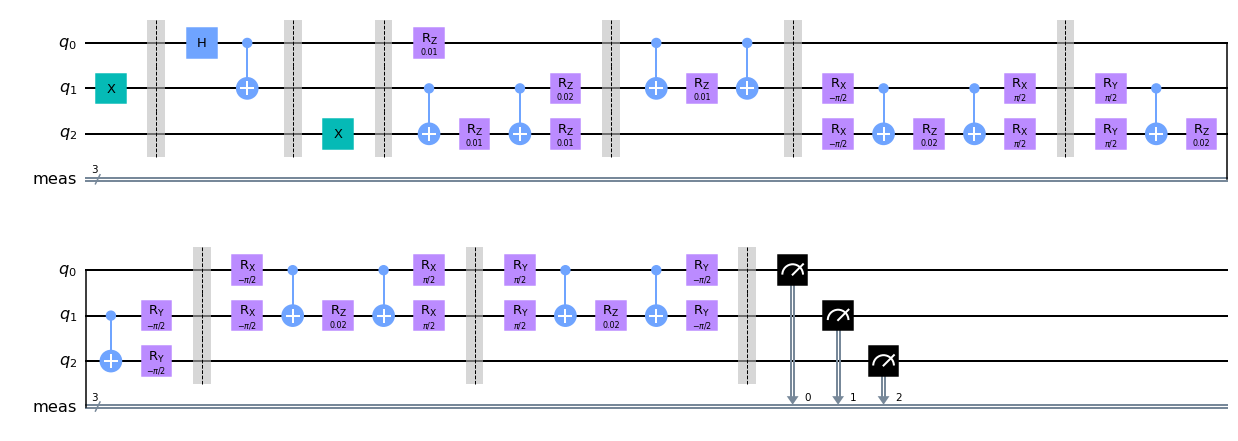

In [126]:
circ3[2].draw('mpl')

In [184]:
results3 = execute(circ3, backend, shots=1024).result()
counts3 = results3.get_counts()

In [185]:
counts3[10]

{'011': 10, '110': 486, '101': 528}

In [186]:
# Extracting Probabilities

C3 = {'000':[],'001':[],'010':[],'011':[],'100':[],'101':[],'110':[],'111':[]}

for co in counts3:
    C3['000'].append(co.get('000',0)/1024)
    C3['001'].append(co.get('001',0)/1024)
    C3['010'].append(co.get('010',0)/1024)
    C3['011'].append(co.get('011',0)/1024)
    C3['100'].append(co.get('100',0)/1024)
    C3['101'].append(co.get('101',0)/1024)
    C3['110'].append(co.get('110',0)/1024)
    C3['111'].append(co.get('111',0)/1024)

In [187]:
len(C3['000'])

500

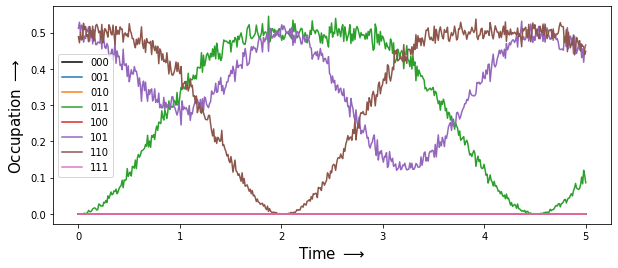

In [188]:
fig = plt.figure(figsize=[10,4])
plt.plot(t,C3['000'], color = 'black')
plt.plot(t,C3['001'])
plt.plot(t,C3['010'])
plt.plot(t,C3['011'])
plt.plot(t,C3['100'])
plt.plot(t,C3['101'])
plt.plot(t,C3['110'])
plt.plot(t,C3['111'])

#plt.title('')
plt.xlabel(rf'Time $\longrightarrow$',fontsize=15)
plt.ylabel(rf'Occupation $\longrightarrow$',fontsize=15)

plt.legend(['000','001','010','011','100','101','110','111'])
plt.show()


### With time dependent V

In [133]:
U = 1
n = 5
t = np.linspace(0,5,500)

circ3 = []

for t0 in t:
    V = V_fun(t0)
    circ3.append(ev_circ3(U,V,n,t0))

In [134]:
results3 = execute(circ3, backend, shots=1024).result()
counts3 = results3.get_counts()

In [135]:
counts3[10]

{'101': 515, '110': 509}

In [136]:
#Extracting Probabilities

C3 = {'000':[],'001':[],'010':[],'011':[],'100':[],'101':[],'110':[],'111':[]}

for co in counts3:
    C3['000'].append(co.get('000',0)/1024)
    C3['001'].append(co.get('001',0)/1024)
    C3['010'].append(co.get('010',0)/1024)
    C3['011'].append(co.get('011',0)/1024)
    C3['100'].append(co.get('100',0)/1024)
    C3['101'].append(co.get('101',0)/1024)
    C3['110'].append(co.get('110',0)/1024)
    C3['111'].append(co.get('111',0)/1024)

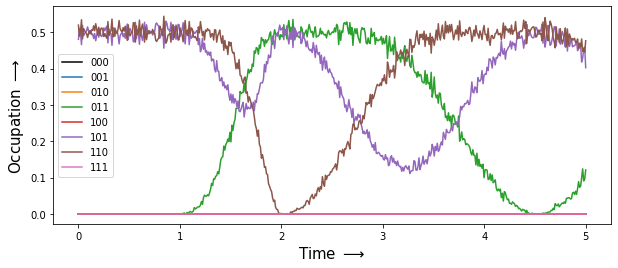

In [154]:
fig = plt.figure(figsize=[10,4])
plt.plot(t,C3['000'], color = 'black')
plt.plot(t,C3['001'])
plt.plot(t,C3['010'])
plt.plot(t,C3['011'])
plt.plot(t,C3['100'])
plt.plot(t,C3['101'])
plt.plot(t,C3['110'])
plt.plot(t,C3['111'])

#plt.title('')
plt.xlabel(rf'Time $\longrightarrow$',fontsize=15)
plt.ylabel(rf'Occupation $\longrightarrow$',fontsize=15)

plt.legend(['000','001','010','011','100','101','110','111'])
plt.show()


In [164]:
# Creating circuit
def ev_circ4(U,V1,V2,n,t):
    
    qc = QuantumCircuit(4)
    
    qc.x(1)
    qc.h(0)
    qc.cx(0,1)
    
    qc.barrier()
    
    qc.x(3)
    qc.h(2)
    qc.cx(2,3)
    
    qc.barrier()
    
    psi1 = V1*t/(2*n)
    psi2 = V2*t/(2*n)
    psiU = U*t/(4*n)
    
    for j in range(n):
        
        qc.rx(pi/2,[0,2])
        qc.ry(pi/2,[1,3])
        
        #sigma_z sigma_z term
        qc.cx(2,3)
        qc.rz(2*psi2, 3)
        qc.cx(2,3)
        
        qc.barrier()
        #sigma_z sigma_z term
        qc.cx(0,1)
        qc.rz(2*psi1, 1)
        qc.cx(0,1)
        
        qc.barrier()
        qc.rx(-pi/2,[0,2])
        qc.ry(-pi/2,[1,3])
        
        #qc.barrier()
        #sigma_z sigma_z term
        qc.cx(1,2)
        qc.rz(2*psiU, 2)
        qc.cx(1,2)
        
        qc.rz(2*psiU, [1,2])
        
        qc.barrier()
        qc.rx(pi/2,[1,3])
        qc.ry(pi/2,[0,2])
        
        #qc.barrier()
        #sigma_z sigma_z term
        qc.cx(2,3)
        qc.rz(2*psi2, 3)
        qc.cx(2,3)
        
        qc.barrier()
        #sigma_z sigma_z term
        qc.cx(0,1)
        qc.rz(2*psi1, 1)
        qc.cx(0,1)
        
        qc.barrier()
        qc.rx(-pi/2,[1,3])
        qc.ry(-pi/2,[0,2])
        
    qc.measure_all()
        
    return qc

In [167]:
V1 = V2 = 1
U = 1
n = 5
t = np.linspace(0,5,500)

circ4 = []

for t0 in t:
    circ4.append(ev_circ4(U,V1,V2,n,t0))

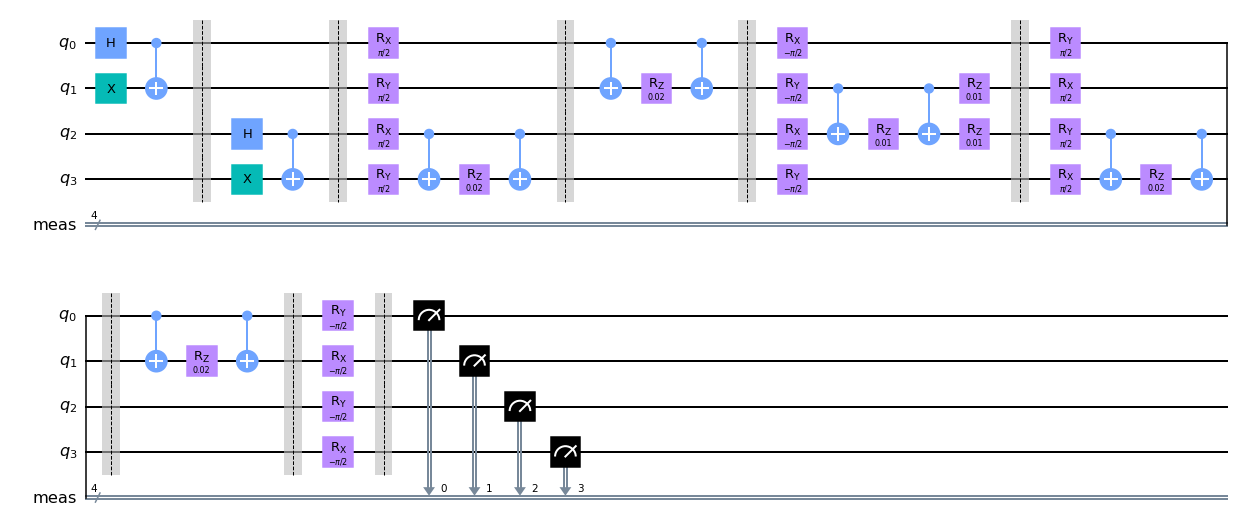

In [86]:
circ4[2].draw('mpl')

In [168]:
results4 = execute(circ4, backend, shots=1024).result()
counts4 = results4.get_counts()

In [169]:
counts4[10]

{'0101': 231, '1001': 267, '1010': 271, '0110': 255}

In [170]:
C4 = {'000':[],'001':[],'010':[],'011':[],'100':[],'101':[],'110':[],'111':[]}

for co in counts4:
    C4['000'].append(co.get('000',0)/1024)
    C4['001'].append(co.get('001',0)/1024)
    C4['010'].append(co.get('010',0)/1024)
    C4['011'].append(co.get('011',0)/1024)
    C4['100'].append(co.get('100',0)/1024)
    C4['101'].append(co.get('101',0)/1024)
    C4['110'].append(co.get('110',0)/1024)
    C4['111'].append(co.get('111',0)/1024)

In [171]:
len(C4['000'])

500

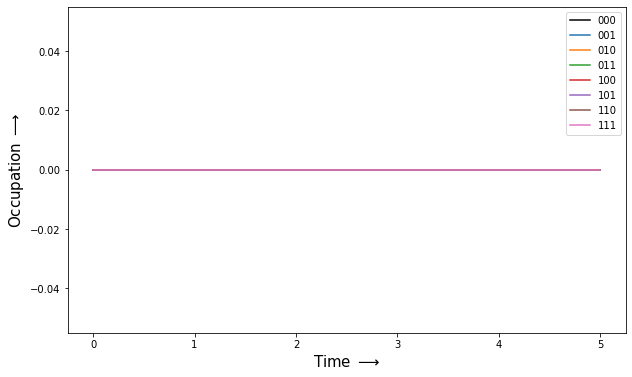

In [172]:
fig = plt.figure(figsize=[10,6])
plt.plot(t,C4['000'], color = 'black')
plt.plot(t,C4['001'])
plt.plot(t,C4['010'])
plt.plot(t,C4['011'])
plt.plot(t,C4['100'])
plt.plot(t,C4['101'])
plt.plot(t,C4['110'])
plt.plot(t,C4['111'])

#plt.title('')
plt.xlabel(rf'Time $\longrightarrow$',fontsize=15)
plt.ylabel(rf'Occupation $\longrightarrow$',fontsize=15)

plt.legend(['000','001','010','011','100','101','110','111'])
plt.show()


### With time dependent V

In [173]:
U = 1
n = 5
t = np.linspace(0,5,500)

circ4 = []

for t0 in t:
    V1 = V_fun(t0)
    V2 = V1
    circ4.append(ev_circ4(U,V1,V2,n,t0))

In [174]:
results4 = execute(circ4, backend, shots=1024).result()
counts4 = results4.get_counts()

In [175]:
counts4[10]

{'0110': 268, '0101': 263, '1010': 231, '1001': 262}

In [176]:
C4 = {'000':[],'001':[],'010':[],'011':[],'100':[],'101':[],'110':[],'111':[]}

for co in counts4:
    C4['000'].append(co.get('000',0)/1024)
    C4['001'].append(co.get('001',0)/1024)
    C4['010'].append(co.get('010',0)/1024)
    C4['011'].append(co.get('011',0)/1024)
    C4['100'].append(co.get('100',0)/1024)
    C4['101'].append(co.get('101',0)/1024)
    C4['110'].append(co.get('110',0)/1024)
    C4['111'].append(co.get('111',0)/1024)

In [177]:
len(C4['000'])

500

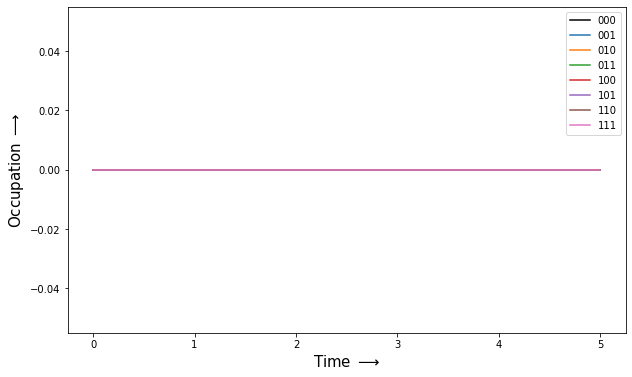

In [178]:
fig = plt.figure(figsize=[10,6])
plt.plot(t,C4['000'], color = 'black')
plt.plot(t,C4['001'])
plt.plot(t,C4['010'])
plt.plot(t,C4['011'])
plt.plot(t,C4['100'])
plt.plot(t,C4['101'])
plt.plot(t,C4['110'])
plt.plot(t,C4['111'])

#plt.title('')
plt.xlabel(rf'Time $\longrightarrow$',fontsize=15)
plt.ylabel(rf'Occupation $\longrightarrow$',fontsize=15)

plt.legend(['000','001','010','011','100','101','110','111'])
plt.show()


#### 

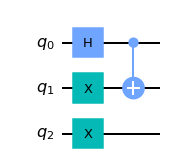

In [102]:
c = QuantumCircuit(3)
# Apply H-gate to the first:
c.x(1)
#c.barrier()
c.h(0)
# Apply a CNOT:
c.cx(0,1)

#c.barrier()
c.x(2)
c.draw('mpl')

In [103]:
# Let's get the result:
c.save_statevector()
qobj = assemble(c)
svsim = Aer.get_backend('aer_simulator')
result = svsim.run(qobj).result()
# Print the statevector neatly:
final_state = result.get_statevector()
array_to_latex(final_state, prefix="\\text{Statevector = }")

<IPython.core.display.Latex object>

In [94]:
from qiskit.visualization import *

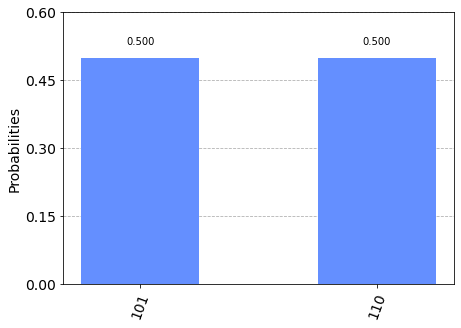

In [104]:
plot_histogram(result.get_counts())